<font size="4"><b>Problem statement:</b>
Exhibit various offshoots of Hypothesis testing using data of your choice. </font>

<br/><br/> 

In [1]:
# Importing libraries.
import wget
import pandas as pd
import numpy as np
from numpy.random import randn

import scipy
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# Ignoring warnings.
import warnings
warnings.filterwarnings('ignore')

### 1. Normality test
* Shapiro-Wilk test
* k^2 Normality test

#### a. Shapiro-Wilk test

In [3]:
file_name  = "WineQualityRed.csv"
zenodo_url = "https://zenodo.org/record/4090212/files/"

In [4]:
# Downloading the file HR_Analytics.csv from Zenodo.
wget.download(zenodo_url + file_name, "./Assets/" + file_name)

'./Assets/WineQualityRed.csv'

In [5]:
# Loading the downloaded file into dataframe.
df = pd.read_csv("./Assets/WineQualityRed.csv")

In [6]:
# A bird's eye view on the dataframe.
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
df= pd.read_csv("Assets\WineQualityRed.csv")

In [4]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


(array([ 73., 405., 423., 475., 148.,  51.,  18.,   3.,   2.,   1.]),
 array([0.12 , 0.266, 0.412, 0.558, 0.704, 0.85 , 0.996, 1.142, 1.288,
        1.434, 1.58 ]),
 <a list of 10 Patch objects>)

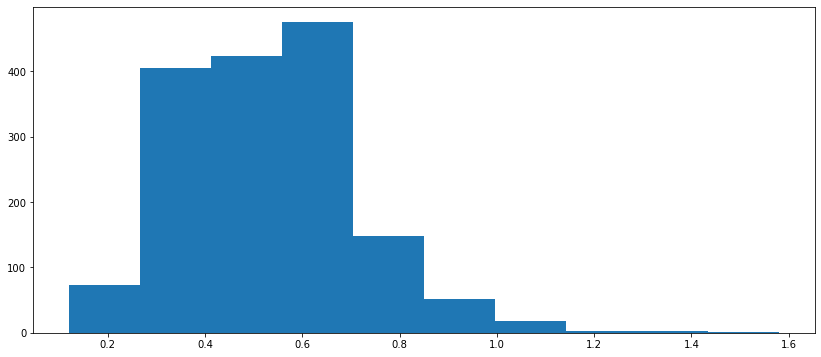

In [5]:
plt.figure(figsize=(14,6))
plt.hist(df['volatile acidity'])

In [6]:
DataToTest = df['volatile acidity']
stat, p = shapiro(DataToTest)
print('stat=%.2f, p=%.30f' % (stat, p))
if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.97, p=0.000000000000000268680677283857
Not a normal distribution


In [7]:
#Lets genrate normally distributed data from Python
from numpy.random import randn
DataToTest = randn(100)
DataToTest

array([-0.80099777,  0.73036659, -0.788125  , -1.13062848,  2.11452137,
        0.34292148,  1.21865707, -0.94797202, -0.36364074,  2.38732642,
       -1.69528691,  1.19125626,  0.15625384, -0.9828371 , -0.72154134,
        1.9159529 , -1.47957831, -1.69278524, -2.42203223, -1.47473743,
       -2.3572515 ,  1.08496996, -0.67677203, -0.00466212, -1.25505872,
        0.42664992, -1.20406163, -1.01179387, -0.77105269, -2.07523911,
       -1.6097938 ,  0.39971783, -0.83324186,  0.68249382,  1.08834368,
        2.98751366, -0.73137643,  1.76836544, -0.06564168,  1.40605842,
       -0.70479484,  1.86249253, -1.00675669, -0.47275951, -0.6817772 ,
        1.58721055, -0.62754866, -0.18166749,  1.51970141, -0.93905621,
       -1.2070133 ,  0.29098272, -1.28829485, -0.90639091, -1.62795656,
        0.15250253,  0.11537291, -0.44331099, -0.54641362,  0.2986052 ,
       -0.33459277,  0.55154813, -1.3480189 , -0.3613294 ,  0.36921336,
        0.25811034,  1.43654409,  0.19637549, -0.45046073,  1.03

In [8]:
stat, p = shapiro(DataToTest)
print('stat=%.2f, p=%.30f' % (stat, p))
if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.98, p=0.216388255357742309570312500000
Normal distribution


#### b. K^2 Normality test

In [10]:
DataToTest = df['volatile acidity']
stat, p = normaltest(DataToTest)
print('stat=%.10f, p=%.10f' % (stat, p))
if p > 0.05:
    print('Normal')
else:
    print('Not Normllay distributed')

stat=143.4193435598, p=0.0000000000
Not Normllay distributed


### 2. Correlation Test 
* For continuous variables - Pearson and Spearman’s Rank Correlation
* For categorical variables - Chi square test

#### a. Continuous Variables

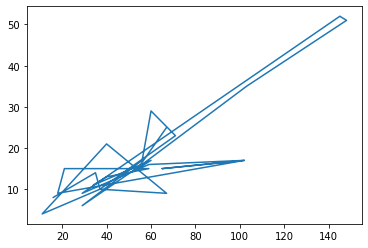

In [12]:
FirstSample = df[1:30]['total sulfur dioxide']
SecondSample = df[1:30]['free sulfur dioxide']
plt.plot(FirstSample,SecondSample)

In [13]:
# Spearman Rank Correlation
from scipy.stats import spearmanr
stat, p = spearmanr(FirstSample, SecondSample)
print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.805, p=0.000000
dependent samples


In [14]:
# Pearson correlation
from scipy.stats import pearsonr
stat, p = pearsonr(FirstSample, SecondSample)
print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.855, p=0.000000
dependent samples


In [15]:
df[1:30].corr(method="spearman")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.287133,0.518645,0.101947,0.321192,0.300050,0.408255,0.325321,-0.681308,0.415988,-0.111514,0.222573
volatile acidity,-0.287133,1.000000,-0.808188,0.151948,-0.005305,-0.162360,-0.160005,0.072174,0.198740,-0.146946,-0.052345,-0.325622
citric acid,0.518645,-0.808188,1.000000,0.052783,0.192278,0.365744,0.412825,0.320100,-0.448153,0.531622,0.007761,0.163375
residual sugar,0.101947,0.151948,0.052783,1.000000,-0.026722,0.297213,0.443779,0.646597,0.020406,0.159213,0.113853,-0.175338
chlorides,0.321192,-0.005305,0.192278,-0.026722,1.000000,0.167987,0.206837,0.060167,-0.586062,0.620711,-0.442924,-0.222146
free sulfur dioxide,0.300050,-0.162360,0.365744,0.297213,0.167987,1.000000,0.805073,0.392890,-0.102043,0.265340,0.199205,0.233841
total sulfur dioxide,0.408255,-0.160005,0.412825,0.443779,0.206837,0.805073,1.000000,0.473338,-0.258340,0.252005,0.122998,-0.101018
density,0.325321,0.072174,0.320100,0.646597,0.060167,0.392890,0.473338,1.000000,-0.079360,0.392884,-0.132642,-0.182903
pH,-0.681308,0.198740,-0.448153,0.020406,-0.586062,-0.102043,-0.258340,-0.079360,1.000000,-0.579390,0.287642,0.048379
sulphates,0.415988,-0.146946,0.531622,0.159213,0.620711,0.265340,0.252005,0.392884,-0.579390,1.000000,-0.045026,-0.025975


#### b. Categorical variables

In [7]:
file_name  = "Dummy.xlsx"
zenodo_url = "https://zenodo.org/record/4090212/files/"

In [8]:
# Downloading the file HR_Analytics.csv from Zenodo.
wget.download(zenodo_url + file_name, "./Assets/" + file_name)

'./Assets/Dummy.xlsx'

In [10]:
# Loading the downloaded file into dataframe.
df = pd.read_excel("./Assets/Dummy.xlsx")

In [11]:
# A bird's eye view on the dataframe.
df.head(3)

,Grouping1,Grouping2
0,1,1
1,1,1
2,1,1


In [8]:
head_to_head = pd.crosstab(df['Grouping1'], df['Grouping2'],margins = False)

In [9]:
head_to_head

Grouping2,1,2,3
Grouping1,,,
1,3,3,3
2,3,3,3
3,3,3,3


In [12]:
stat, p, dof, expected = chi2_contingency(head_to_head)
print('stat= %.3f, p= %.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

stat= 0.000, p= 1.000
independent categories


In [13]:
# Observe the numbers carefully.
head_to_head = [[25,125],[1200,240]]

In [15]:
stat, p, dof, expected = chi2_contingency(head_to_head)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

stat=337.622, p=0.000
dependent categories


### 3. Parametric test
* T-test
* ANOVA test

#### a. T-test
* Single sample
* Independent samples
* Pair samples

In [8]:
kohli= [23,113,31,151,73,35,26,22,236,91]
smith= [46,203,62,40,38,70,125,44,87,38]

In [9]:
# Checking the mean of both samples.
print('kohli mean score:', np.mean(kohli))
print('smith mean score:', np.mean(smith))

kohli mean score: 80.1
smith mean score: 75.3


In [21]:
# One Sample T-test
scipy.stats.ttest_1samp(kohli,20)

Ttest_1sampResult(statistic=2.7000549807630025, pvalue=0.02439150040697149)

In [22]:
# Independent Samples T-test
scipy.stats.ttest_ind(kohli,smith)

Ttest_indResult(statistic=0.1726353154049999, pvalue=0.8648644021702281)

In [10]:
# Paired samples T-test
kohli_away=[46,4,62,40,105,70,52,44,27,38]
scipy.stats.ttest_rel(kohli,kohli_away)

Ttest_relResult(statistic=1.1576362479826194, pvalue=0.2768104505234216)

#### b. ANOVA test

#### Note: ANOVA test assumes that distributions are normal and identical and have same variances.

In [11]:
stat, p = scipy.stats.f_oneway(kohli,smith, kohli_away)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Same distribution of scores')
else:
    print('Different distributions of scores')

stat=1.009, p=0.378
Same distribution of scores


### 4. Non Parametric test : Mann-Whitney U Test

#### Note: Mann-Whitney U test assumes that distributions are identical and observations can be ranked.

In [1]:
class_1_score = [91,90,81,80,76]
class_2_score = [88,86,85,84,83]

In [4]:
stat, p = scipy.stats.mannwhitneyu(class_1_score, class_2_score)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Same distribution')
else:
    print('Different distributions')

stat=10.000, p=0.338
Same distribution


### 5. Stationarity test : Augmented Dickey-Fuller test

**Note 1: Augmented Dickey-Fuller Test assumes that the given Series is non stationary (Null Hypothesis).**<br /> 
**Note 2: Series with constant mean and variance is a stationary series.**

In [6]:
stock_price_data = [121,131,142,121,131,142,121,131,142]
stat, p, lags, obs, crit, t = adfuller(stock_price_data)

In [7]:
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Series is not Stationary')
else:
    print('Series is stationary')

stat=-2571852228715.173, p=0.000
Series is stationary


<br/><br/> 

<font size="4"> <b>Final thoughts:</b> It is important to note that correlation doesn't always imply causation. It is improper to associate a successful Hypothesis test with a Probability and a Type-I error rate. Because unexpected effects such as Placebo effect might have sneaked into our sample. Moreover, Statistics should not lead to an accept-reject conclusion or decision, but to an estimated value with an interval estimate; this data-analysis philosophy is broadly referred to as Estimation-Statistics.</font>